In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
pip install pyspark

In [59]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Fire DF').getOrCreate()

In [10]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [60]:
df = spark.read.csv('/content/drive/MyDrive/BDA_1_Sem/ABD/ABD_Lab/Hadoop/Pyspark/sf-fire-calls.csv', header = True, inferSchema = True)
df.show()

+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+
|CallNumber|UnitID|IncidentNumber|        CallType|  CallDate| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|
+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+

In [6]:
df.printSchema()

root
 |-- CallNumber: integer (nullable = true)
 |-- UnitID: string (nullable = true)
 |-- IncidentNumber: integer (nullable = true)
 |-- CallType: string (nullable = true)
 |-- CallDate: string (nullable = true)
 |-- WatchDate: string (nullable = true)
 |-- CallFinalDisposition: string (nullable = true)
 |-- AvailableDtTm: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- Battalion: string (nullable = true)
 |-- StationArea: string (nullable = true)
 |-- Box: string (nullable = true)
 |-- OriginalPriority: string (nullable = true)
 |-- Priority: string (nullable = true)
 |-- FinalPriority: integer (nullable = true)
 |-- ALSUnit: boolean (nullable = true)
 |-- CallTypeGroup: string (nullable = true)
 |-- NumAlarms: integer (nullable = true)
 |-- UnitType: string (nullable = true)
 |-- UnitSequenceInCallDispatch: integer (nullable = true)
 |-- FirePreventionDistrict: string (nullable = true)
 

In [11]:
df1 = df.select('CallType','CallDate','City','Zipcode','Neighborhood','Delay')
df1.show()
df1.printSchema()

+----------------+----------+----+-------+--------------------+---------+
|        CallType|  CallDate|City|Zipcode|        Neighborhood|    Delay|
+----------------+----------+----+-------+--------------------+---------+
|  Structure Fire|01/11/2002|  SF|  94109|     Pacific Heights|     2.95|
|Medical Incident|01/11/2002|  SF|  94124|Bayview Hunters P...|      4.7|
|Medical Incident|01/11/2002|  SF|  94102|          Tenderloin|2.4333334|
|    Vehicle Fire|01/11/2002|  SF|  94110|      Bernal Heights|      1.5|
|          Alarms|01/11/2002|  SF|  94109|    Western Addition|3.4833333|
|  Structure Fire|01/11/2002|  SF|  94105|Financial Distric...|     1.75|
|          Alarms|01/11/2002|  SF|  94112|Oceanview/Merced/...|2.7166667|
|          Alarms|01/11/2002|  SF|  94102|          Tenderloin|1.7833333|
|Medical Incident|01/11/2002|  SF|  94115|           Japantown|1.5166667|
|Medical Incident|01/11/2002|  SF|  94114| Castro/Upper Market|2.7666667|
|Medical Incident|01/11/2002|  SF|  94

In [12]:
df2 = df1.withColumn('Date', to_date(col('CallDate'), 'MM/dd/yyyy')).drop('CallDate')
df2.show()
df2.printSchema()

+----------------+----+-------+--------------------+---------+----------+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|
+----------------+----+-------+--------------------+---------+----------+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|
|          Alarms|  SF|  94102|          Tenderloin|1.7833333|2002-01-11|
|Medical Incident|  SF|  94115|           Japantown|1.5166667|2002-01-11|
|Medical Incident|  SF|  94114| Castro/Upper Market|2.7666667|2002-01-11|
|Medical Incident|  SF|  94110|       

In [13]:
df3 = df2.withColumn('Year', year(col('Date')))\
.withColumn('Month', month(col('Date')))\
.withColumn('Week', weekofyear(col('Date')))
df3.show()
df3.printSchema()

+----------------+----+-------+--------------------+---------+----------+----+-----+----+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|Year|Month|Week|
+----------------+----+-------+--------------------+---------+----------+----+-----+----+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|2002|    1|   2|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|2002|    1|   2|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|2002|    1|   2|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|2002|    1|   2|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|2002|    1|   2|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|2002|    1|   2|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|2002|    1|   2|
|          Alarms|  SF|  94102|          Tenderloin|1.7833333|2002-01-11|2002|    1|   2|
|Medical I

In [14]:
def mapSeason(data):
  if 2 < data < 6:
    return 'Spring'
  elif 5 < data < 9:
    return 'Summer'
  elif 8 < data < 12:
    return 'Autumn'
  else:
    return 'Winter'

SeasonUDF = udf(mapSeason, StringType())
df4 = df3.withColumn('Season', SeasonUDF(col('Month')))
df4.show()
df4.printSchema()

+----------------+----+-------+--------------------+---------+----------+----+-----+----+------+
|        CallType|City|Zipcode|        Neighborhood|    Delay|      Date|Year|Month|Week|Season|
+----------------+----+-------+--------------------+---------+----------+----+-----+----+------+
|  Structure Fire|  SF|  94109|     Pacific Heights|     2.95|2002-01-11|2002|    1|   2|Winter|
|Medical Incident|  SF|  94124|Bayview Hunters P...|      4.7|2002-01-11|2002|    1|   2|Winter|
|Medical Incident|  SF|  94102|          Tenderloin|2.4333334|2002-01-11|2002|    1|   2|Winter|
|    Vehicle Fire|  SF|  94110|      Bernal Heights|      1.5|2002-01-11|2002|    1|   2|Winter|
|          Alarms|  SF|  94109|    Western Addition|3.4833333|2002-01-11|2002|    1|   2|Winter|
|  Structure Fire|  SF|  94105|Financial Distric...|     1.75|2002-01-11|2002|    1|   2|Winter|
|          Alarms|  SF|  94112|Oceanview/Merced/...|2.7166667|2002-01-11|2002|    1|   2|Winter|
|          Alarms|  SF|  94102

Q1) Get yearly count of fire calls

In [15]:
df5 = df4.filter((df4.CallType == 'Structure Fire') | (df4.CallType == 'Vehicle Fire') | (df4.CallType == 'Outside Fire') | (df4.CallType == 'Marine Fire')) \
.select('Year') \
.groupBy('Year') \
.count() \
.orderBy('Year', ascending = True)
df5.show()

+----+-----+
|Year|count|
+----+-----+
|2000| 1104|
|2001| 1687|
|2002| 1696|
|2003| 1725|
|2004| 1419|
|2005| 1322|
|2006| 1375|
|2007| 1247|
|2008| 1309|
|2009| 1313|
|2010| 1314|
|2011| 1451|
|2012| 1529|
|2013| 1412|
|2014| 1437|
|2015| 1353|
|2016| 1284|
|2017| 1217|
|2018| 1087|
+----+-----+



In [16]:
df5 = df4.select('Year').groupBy('Year').count().orderBy('Year', ascending = True)
df5.show()

+----+-----+
|Year|count|
+----+-----+
|2000| 5459|
|2001| 7713|
|2002| 8090|
|2003| 8499|
|2004| 8283|
|2005| 8282|
|2006| 8174|
|2007| 8255|
|2008| 8869|
|2009| 8789|
|2010| 9341|
|2011| 9735|
|2012| 9674|
|2013|10020|
|2014|10775|
|2015|11458|
|2016|11609|
|2017|12135|
|2018|10136|
+----+-----+



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year'>

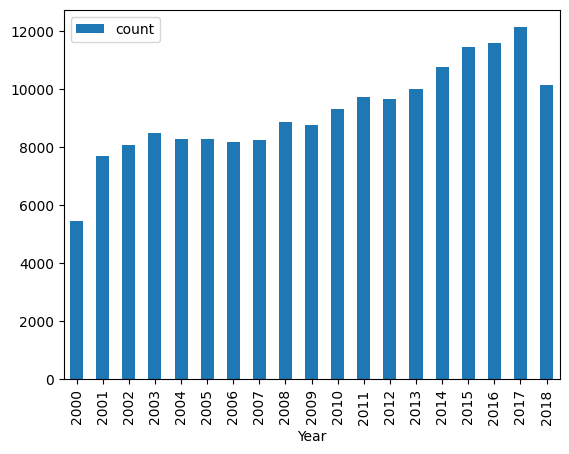

In [18]:
plot = df4.select('Year').groupBy('Year').count().orderBy('Year', ascending = True).toPandas()
plot.plot(kind = 'bar', x = 'Year', y = 'count')

Q2) What were all the different types of fire calls in 2018?

In [19]:
from os import truncate
df6 = df4.select('CallType').where(col('Year') == 2018).distinct().show(truncate = False)

+-------------------------------+
|CallType                       |
+-------------------------------+
|Elevator / Escalator Rescue    |
|Alarms                         |
|Odor (Strange / Unknown)       |
|Citizen Assist / Service Call  |
|HazMat                         |
|Vehicle Fire                   |
|Other                          |
|Outside Fire                   |
|Traffic Collision              |
|Assist Police                  |
|Gas Leak (Natural and LP Gases)|
|Water Rescue                   |
|Electrical Hazard              |
|Structure Fire                 |
|Medical Incident               |
|Fuel Spill                     |
|Smoke Investigation (Outside)  |
|Train / Rail Incident          |
|Explosion                      |
|Suspicious Package             |
+-------------------------------+



In [20]:
df4.createOrReplaceTempView('Fire')
spark.sql('SELECT CallType FROM Fire WHERE Year = 2018 GROUP BY CallType').show(truncate = False)

+-------------------------------+
|CallType                       |
+-------------------------------+
|Elevator / Escalator Rescue    |
|Alarms                         |
|Odor (Strange / Unknown)       |
|Citizen Assist / Service Call  |
|HazMat                         |
|Vehicle Fire                   |
|Other                          |
|Outside Fire                   |
|Traffic Collision              |
|Assist Police                  |
|Gas Leak (Natural and LP Gases)|
|Water Rescue                   |
|Electrical Hazard              |
|Structure Fire                 |
|Medical Incident               |
|Fuel Spill                     |
|Smoke Investigation (Outside)  |
|Train / Rail Incident          |
|Explosion                      |
|Suspicious Package             |
+-------------------------------+



In [21]:
spark.sql('SELECT Year FROM Fire WHERE Delay > 520').show()

+----+
|Year|
+----+
|2003|
|2014|
|2015|
|2017|
|2017|
|2007|
|2004|
|2011|
|2000|
+----+



Q3) Which week in the year in 2018 had the most fire calls?

In [22]:
df7 = df4.select('Week').where(col('Year')==2018).groupBy('Week').count().orderBy('count',ascending=False)
df7.collect()[0]

Row(Week=22, count=259)

In [23]:
max_months = df4.select('Week').where(col('Year') == 2018).groupBy('Week').count()
max_months.select('Week','count').filter(col('count') == max_months.agg({'count':'max'}).collect()[0][0]).collect()[0][0]

22

Q1) Get yearly count of fire calls

In [24]:
df4.select('Year').groupBy('Year').count().orderBy('Year', ascending = True).show()

+----+-----+
|Year|count|
+----+-----+
|2000| 5459|
|2001| 7713|
|2002| 8090|
|2003| 8499|
|2004| 8283|
|2005| 8282|
|2006| 8174|
|2007| 8255|
|2008| 8869|
|2009| 8789|
|2010| 9341|
|2011| 9735|
|2012| 9674|
|2013|10020|
|2014|10775|
|2015|11458|
|2016|11609|
|2017|12135|
|2018|10136|
+----+-----+



Q2) What were all the different types of fire calls in 2018?

In [25]:
df4.select('CallType').where(col('Year') == 2018).distinct().show(truncate = False)

+-------------------------------+
|CallType                       |
+-------------------------------+
|Elevator / Escalator Rescue    |
|Alarms                         |
|Odor (Strange / Unknown)       |
|Citizen Assist / Service Call  |
|HazMat                         |
|Vehicle Fire                   |
|Other                          |
|Outside Fire                   |
|Traffic Collision              |
|Assist Police                  |
|Gas Leak (Natural and LP Gases)|
|Water Rescue                   |
|Electrical Hazard              |
|Structure Fire                 |
|Medical Incident               |
|Fuel Spill                     |
|Smoke Investigation (Outside)  |
|Train / Rail Incident          |
|Explosion                      |
|Suspicious Package             |
+-------------------------------+



Q3) Which week in the year in 2018 had the most fire calls?

In [26]:
df4.select('Week').where(col('Year')==2018).groupBy('Week').count().orderBy('count',ascending=False).show()

+----+-----+
|Week|count|
+----+-----+
|  22|  259|
|  40|  255|
|  43|  250|
|  25|  249|
|   1|  246|
|  44|  244|
|  13|  243|
|  32|  243|
|  11|  240|
|   5|  236|
|  18|  236|
|  23|  235|
|  31|  234|
|  42|  234|
|   2|  234|
|  19|  233|
|   8|  232|
|  10|  232|
|  34|  232|
|  28|  231|
+----+-----+
only showing top 20 rows



Q4) Get monthly count of fire calls based on year (2015)

In [27]:
df4.select('Month').where(col('Year') == 2015).groupBy('Month').count().orderBy('Month', ascending = True).show()

+-----+-----+
|Month|count|
+-----+-----+
|    1| 1009|
|    2|  917|
|    3| 1007|
|    4|  905|
|    5| 1012|
|    6|  959|
|    7|  930|
|    8|  921|
|    9|  994|
|   10|  912|
|   11|  930|
|   12|  962|
+-----+-----+



Q5) Give monthly report of fire call types for selected year (2016) using Window function in sql

In [28]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col,count

df4.select('CallType','Month')\
.where(col('Year') == 2016)\
.groupBy('CallType','Month')\
.count()\
.withColumn('MonthlyCount',count('count').over(Window.partitionBy('Month')))\
.orderBy('Month',ascending = True)\
.show()

+--------------------+-----+-----+------------+
|            CallType|Month|count|MonthlyCount|
+--------------------+-----+-----+------------+
|       Assist Police|    1|    1|          16|
|               Other|    1|    8|          16|
|      Structure Fire|    1|   99|          16|
|Watercraft in Dis...|    1|    1|          16|
|        Vehicle Fire|    1|    3|          16|
|Citizen Assist / ...|    1|    8|          16|
|Gas Leak (Natural...|    1|    4|          16|
|   Traffic Collision|    1|   41|          16|
|   Electrical Hazard|    1|    1|          16|
|Train / Rail Inci...|    1|    2|          16|
|          Fuel Spill|    1|    3|          16|
|        Water Rescue|    1|   11|          16|
|              Alarms|    1|  112|          16|
|Elevator / Escala...|    1|    2|          16|
|        Outside Fire|    1|   18|          16|
|    Medical Incident|    1|  689|          16|
|   Electrical Hazard|    2|    1|          14|
|              Alarms|    2|   99|      

In [29]:
df4.select('CallType','Month').where(col('Year')==2016).groupBy('Month','CallType').count().orderBy('Month','count',ascending=[1,0]).show(40)

+-----+--------------------+-----+
|Month|            CallType|count|
+-----+--------------------+-----+
|    1|    Medical Incident|  689|
|    1|              Alarms|  112|
|    1|      Structure Fire|   99|
|    1|   Traffic Collision|   41|
|    1|        Outside Fire|   18|
|    1|        Water Rescue|   11|
|    1|               Other|    8|
|    1|Citizen Assist / ...|    8|
|    1|Gas Leak (Natural...|    4|
|    1|        Vehicle Fire|    3|
|    1|          Fuel Spill|    3|
|    1|Train / Rail Inci...|    2|
|    1|Elevator / Escala...|    2|
|    1|Watercraft in Dis...|    1|
|    1|   Electrical Hazard|    1|
|    1|       Assist Police|    1|
|    2|    Medical Incident|  668|
|    2|              Alarms|   99|
|    2|      Structure Fire|   79|
|    2|   Traffic Collision|   35|
|    2|        Outside Fire|   11|
|    2|               Other|   10|
|    2|        Water Rescue|    9|
|    2|Citizen Assist / ...|    8|
|    2|Elevator / Escala...|    4|
|    2|        Vehic

In [30]:
df4.select('CallType','Month').where(col('Year') == 2016).groupBy('CallType','Month').count().orderBy('Month', ascending = True).show()

+--------------------+-----+-----+
|            CallType|Month|count|
+--------------------+-----+-----+
|       Assist Police|    1|    1|
|               Other|    1|    8|
|      Structure Fire|    1|   99|
|Watercraft in Dis...|    1|    1|
|        Vehicle Fire|    1|    3|
|Citizen Assist / ...|    1|    8|
|Gas Leak (Natural...|    1|    4|
|   Traffic Collision|    1|   41|
|   Electrical Hazard|    1|    1|
|Train / Rail Inci...|    1|    2|
|          Fuel Spill|    1|    3|
|        Water Rescue|    1|   11|
|              Alarms|    1|  112|
|Elevator / Escala...|    1|    2|
|        Outside Fire|    1|   18|
|    Medical Incident|    1|  689|
|   Electrical Hazard|    2|    1|
|              Alarms|    2|   99|
|   High Angle Rescue|    2|    1|
|        Outside Fire|    2|   11|
+--------------------+-----+-----+
only showing top 20 rows



Q6) Give top five fire call types for every season of selected year (seasons are like Spring, summer, fall
winter etc).

In [31]:
df4.select('CallType','Season').where(col('Year') == 2018).groupBy('CallType','Season').count().orderBy('count', ascending = False).show()

+-----------------+------+-----+
|         CallType|Season|count|
+-----------------+------+-----+
| Medical Incident|Spring| 2110|
| Medical Incident|Summer| 2053|
| Medical Incident|Autumn| 1514|
| Medical Incident|Winter| 1327|
|           Alarms|Summer|  336|
|           Alarms|Spring|  333|
|   Structure Fire|Summer|  262|
|   Structure Fire|Spring|  261|
|           Alarms|Autumn|  251|
|           Alarms|Winter|  224|
|   Structure Fire|Autumn|  201|
|   Structure Fire|Winter|  182|
|Traffic Collision|Spring|  133|
|Traffic Collision|Summer|  121|
|Traffic Collision|Autumn|  100|
|Traffic Collision|Winter|   79|
|     Outside Fire|Summer|   61|
|     Outside Fire|Autumn|   39|
|            Other|Summer|   39|
|            Other|Spring|   36|
+-----------------+------+-----+
only showing top 20 rows



In [32]:
from pyspark.sql.window import Window
SeasonCount = df4.select('CallType','Season')\
.filter(col('Year') == 2018)\
.groupBy('CallType','Season')\
.count()\
.orderBy('count', ascending = False)
SeasonCount.show()

+-----------------+------+-----+
|         CallType|Season|count|
+-----------------+------+-----+
| Medical Incident|Spring| 2110|
| Medical Incident|Summer| 2053|
| Medical Incident|Autumn| 1514|
| Medical Incident|Winter| 1327|
|           Alarms|Summer|  336|
|           Alarms|Spring|  333|
|   Structure Fire|Summer|  262|
|   Structure Fire|Spring|  261|
|           Alarms|Autumn|  251|
|           Alarms|Winter|  224|
|   Structure Fire|Autumn|  201|
|   Structure Fire|Winter|  182|
|Traffic Collision|Spring|  133|
|Traffic Collision|Summer|  121|
|Traffic Collision|Autumn|  100|
|Traffic Collision|Winter|   79|
|     Outside Fire|Summer|   61|
|     Outside Fire|Autumn|   39|
|            Other|Summer|   39|
|            Other|Spring|   36|
+-----------------+------+-----+
only showing top 20 rows



In [33]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, count

df4.select('CallType','Month')\
.where(col('Year') == 2016)\
.groupBy('CallType','Month')\
.count()\
.withColumn('MonthlyCount', count('count').over(Window.partitionBy('Month')))\
.orderBy('Month', ascending = True)\
.show()

+--------------------+-----+-----+------------+
|            CallType|Month|count|MonthlyCount|
+--------------------+-----+-----+------------+
|       Assist Police|    1|    1|          16|
|               Other|    1|    8|          16|
|      Structure Fire|    1|   99|          16|
|Watercraft in Dis...|    1|    1|          16|
|        Vehicle Fire|    1|    3|          16|
|Citizen Assist / ...|    1|    8|          16|
|Gas Leak (Natural...|    1|    4|          16|
|   Traffic Collision|    1|   41|          16|
|   Electrical Hazard|    1|    1|          16|
|Train / Rail Inci...|    1|    2|          16|
|          Fuel Spill|    1|    3|          16|
|        Water Rescue|    1|   11|          16|
|              Alarms|    1|  112|          16|
|Elevator / Escala...|    1|    2|          16|
|        Outside Fire|    1|   18|          16|
|    Medical Incident|    1|  689|          16|
|   Electrical Hazard|    2|    1|          14|
|              Alarms|    2|   99|      

Q7) Whether fire type calls are seasonal?

In [34]:
seasonalFire = df4.select('CallType','Season').groupBy('CallType','Season').count().orderBy('count', ascending = False)
seasonalFire.show(200)

+--------------------+------+-----+
|            CallType|Season|count|
+--------------------+------+-----+
|    Medical Incident|Spring|28802|
|    Medical Incident|Summer|28623|
|    Medical Incident|Autumn|28569|
|    Medical Incident|Winter|27800|
|      Structure Fire|Summer| 6089|
|      Structure Fire|Autumn| 5921|
|      Structure Fire|Spring| 5747|
|      Structure Fire|Winter| 5562|
|              Alarms|Autumn| 4980|
|              Alarms|Summer| 4910|
|              Alarms|Winter| 4875|
|              Alarms|Spring| 4641|
|   Traffic Collision|Autumn| 1858|
|   Traffic Collision|Spring| 1754|
|   Traffic Collision|Summer| 1747|
|   Traffic Collision|Winter| 1654|
|        Outside Fire|Summer|  679|
|Citizen Assist / ...|Summer|  669|
|Citizen Assist / ...|Autumn|  646|
|Citizen Assist / ...|Winter|  610|
|Citizen Assist / ...|Spring|  599|
|               Other|Autumn|  565|
|               Other|Winter|  543|
|               Other|Spring|  531|
|               Other|Summer

Q8) What months within the year 2018 saw the highest number of fire calls?

In [35]:
highmonth2018 = df4.select('Month').where(col('Year') == 2018).groupBy('Month').count().orderBy('count', ascending = False)
highmonth2018.show()

+-----+-----+
|Month|count|
+-----+-----+
|   10| 1068|
|    5| 1047|
|    3| 1029|
|    8| 1021|
|    1| 1007|
|    6|  974|
|    7|  974|
|    9|  951|
|    4|  947|
|    2|  919|
|   11|  199|
+-----+-----+



In [64]:
df3.printSchema()

root
 |-- CallType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Delay: double (nullable = true)
 |-- Date: date (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Week: integer (nullable = true)



In [72]:
df3.createOrReplaceTempView('Fire')

In [71]:
spark.sql('SELECT Month, COUNT(Month) as count FROM Fire WHERE Year = 2018 GROUP BY Month ORDER BY count DESC').show()

+-----+-----+
|Month|count|
+-----+-----+
|   10| 1068|
|    5| 1047|
|    3| 1029|
|    8| 1021|
|    1| 1007|
|    6|  974|
|    7|  974|
|    9|  951|
|    4|  947|
|    2|  919|
|   11|  199|
+-----+-----+



In [36]:
highmonth2018 = df4.select('Month').where(col('Year') == 2018).groupBy('Month').count().orderBy('Month', ascending = True)
highmonth2018.show()

+-----+-----+
|Month|count|
+-----+-----+
|    1| 1007|
|    2|  919|
|    3| 1029|
|    4|  947|
|    5| 1047|
|    6|  974|
|    7|  974|
|    8| 1021|
|    9|  951|
|   10| 1068|
|   11|  199|
+-----+-----+



Q9) Find which type of fire call is major calltype in each year

In [37]:
majorFire = df4.select('CallType','Year').groupBy('CallType','Year').count().orderBy('count', ascending = False)
majorFire.show()

+----------------+----+-----+
|        CallType|Year|count|
+----------------+----+-----+
|Medical Incident|2017| 8330|
|Medical Incident|2016| 7999|
|Medical Incident|2015| 7812|
|Medical Incident|2014| 7176|
|Medical Incident|2018| 7004|
|Medical Incident|2013| 6690|
|Medical Incident|2011| 6413|
|Medical Incident|2012| 6296|
|Medical Incident|2010| 6186|
|Medical Incident|2008| 5692|
|Medical Incident|2009| 5671|
|Medical Incident|2004| 5137|
|Medical Incident|2007| 5114|
|Medical Incident|2005| 5084|
|Medical Incident|2003| 5056|
|Medical Incident|2002| 5046|
|Medical Incident|2006| 5027|
|Medical Incident|2001| 4653|
|Medical Incident|2000| 3408|
|  Structure Fire|2002| 1573|
+----------------+----+-----+
only showing top 20 rows



Q10) Find out average delay in response for each call type

In [38]:
delay = df4.select('CallType','Delay').groupBy('CallType').avg('Delay').orderBy('avg(Delay)', ascending = False)
delay.show()

+--------------------+------------------+
|            CallType|        avg(Delay)|
+--------------------+------------------+
|Mutual Aid / Assi...| 38.41666631111111|
|       Assist Police|26.981903994285716|
|Train / Rail Inci...|16.452046763157895|
|      Administrative|12.261111333333332|
|              HazMat| 7.527016126612902|
|         Marine Fire| 6.928571314285715|
|Confined Space / ...| 6.915384576923078|
|Watercraft in Dis...| 6.886904817857142|
|  Suspicious Package|6.5766667199999995|
|   High Angle Rescue|6.0489583750000016|
|        Water Rescue| 5.507748342145695|
|               Other| 5.505155432421978|
|          Fuel Spill| 5.492227982383421|
|Citizen Assist / ...| 5.473342576604596|
|   Electrical Hazard| 5.178112038174274|
|Industrial Accidents| 5.014716334042553|
|           Oil Spill| 4.977777761904762|
|Odor (Strange / U...| 4.947959182000003|
|Gas Leak (Natural...|  4.58339877840314|
|Smoke Investigati...| 4.466069897851662|
+--------------------+------------

In [39]:
delay = df4.select('CallType', 'Delay').groupBy('CallType').agg(round(avg('Delay'), 2).alias('avg(Delay)')).orderBy('avg(Delay)', ascending=False)
delay.show()

+--------------------+----------+
|            CallType|avg(Delay)|
+--------------------+----------+
|Mutual Aid / Assi...|     38.42|
|       Assist Police|     26.98|
|Train / Rail Inci...|     16.45|
|      Administrative|     12.26|
|              HazMat|      7.53|
|         Marine Fire|      6.93|
|Confined Space / ...|      6.92|
|Watercraft in Dis...|      6.89|
|  Suspicious Package|      6.58|
|   High Angle Rescue|      6.05|
|               Other|      5.51|
|        Water Rescue|      5.51|
|          Fuel Spill|      5.49|
|Citizen Assist / ...|      5.47|
|   Electrical Hazard|      5.18|
|Industrial Accidents|      5.01|
|           Oil Spill|      4.98|
|Odor (Strange / U...|      4.95|
|Gas Leak (Natural...|      4.58|
|Smoke Investigati...|      4.47|
+--------------------+----------+
only showing top 20 rows



Q11) Find which calltype has maximum average delay time.

In [40]:
max_delay = df4.select('CallType', 'Delay').groupBy('CallType').agg(round(avg('Delay'), 2).alias('avg(Delay)')).orderBy('avg(Delay)', ascending=False).limit(1)
max_delay.show()

+--------------------+----------+
|            CallType|avg(Delay)|
+--------------------+----------+
|Mutual Aid / Assi...|     38.42|
+--------------------+----------+



Q12) Which neighborhood in San Francisco generated the most fire calls in 2018?

In [41]:
neighborhood = df4.select('Neighborhood').where(col('Year') == 2018).groupBy('Neighborhood').count().orderBy('count', ascending = False)
neighborhood.show(100)

+--------------------+-----+
|        Neighborhood|count|
+--------------------+-----+
|          Tenderloin| 1393|
|     South of Market| 1053|
|             Mission|  913|
|Financial Distric...|  772|
|Bayview Hunters P...|  522|
|    Western Addition|  352|
|     Sunset/Parkside|  346|
|            Nob Hill|  295|
|        Hayes Valley|  291|
|      Outer Richmond|  262|
| Castro/Upper Market|  251|
|         North Beach|  231|
|           Excelsior|  212|
|        Potrero Hill|  210|
|  West of Twin Peaks|  210|
|           Chinatown|  191|
|              Marina|  191|
|     Pacific Heights|  191|
|         Mission Bay|  178|
|      Bernal Heights|  170|
|           Lakeshore|  159|
|        Inner Sunset|  154|
|        Russian Hill|  147|
|      Haight Ashbury|  140|
|Oceanview/Merced/...|  139|
|       Outer Mission|  137|
|      Inner Richmond|  129|
|   Lone Mountain/USF|  108|
|   Visitacion Valley|  105|
|           Japantown|   94|
|             Portola|   83|
|          Noe

Q13) Which neighborhoods had the worst response times to fire calls in 2018?

In [42]:
neig_res = df4.select('Neighborhood','Delay').where(col('Year') == 2018).groupBy('Neighborhood').agg(round(avg('Delay'), 2).alias('avg(Delay)')).orderBy('avg(Delay)', ascending = False)
neig_res.show(100)

+--------------------+----------+
|        Neighborhood|avg(Delay)|
+--------------------+----------+
|           Chinatown|      6.19|
|            Presidio|      5.83|
|     Treasure Island|      5.45|
|        McLaren Park|      4.74|
|Bayview Hunters P...|      4.62|
|    Presidio Heights|      4.59|
|        Inner Sunset|      4.44|
|      Inner Richmond|      4.36|
|Financial Distric...|      4.34|
|      Haight Ashbury|      4.27|
|            Seacliff|      4.26|
|        Potrero Hill|      4.19|
|  West of Twin Peaks|      4.19|
|     Pacific Heights|      4.18|
|          Tenderloin|       4.1|
|Oceanview/Merced/...|      3.95|
|           Excelsior|      3.94|
|         North Beach|      3.89|
|           Lakeshore|      3.88|
|      Bernal Heights|      3.85|
|         Mission Bay|      3.85|
|    Golden Gate Park|      3.84|
|     South of Market|      3.82|
|            Nob Hill|       3.8|
| Castro/Upper Market|       3.8|
|        Russian Hill|      3.79|
|          Twi

In [43]:
neig_res = df4.select('Neighborhood','Delay').where(col('Year') == 2018).groupBy('Neighborhood').agg(round(avg('Delay'), 2).alias('avg(Delay)')).orderBy('avg(Delay)', ascending = False).limit(5)
neig_res.show(100)

+--------------------+----------+
|        Neighborhood|avg(Delay)|
+--------------------+----------+
|           Chinatown|      6.19|
|            Presidio|      5.83|
|     Treasure Island|      5.45|
|        McLaren Park|      4.74|
|Bayview Hunters P...|      4.62|
+--------------------+----------+



q14) Find out calltype whose average response delay time is maximum, increases, decreases or has no
relation over years.

In [44]:
worst_delay = df4.select('CallType','Delay').groupBy('CallType').agg(round(avg('Delay'), 2).alias('avg(Delay)')).orderBy('avg(Delay)', ascending = False).limit(5)
worst_delay.show()

+--------------------+----------+
|            CallType|avg(Delay)|
+--------------------+----------+
|Mutual Aid / Assi...|     38.42|
|       Assist Police|     26.98|
|Train / Rail Inci...|     16.45|
|      Administrative|     12.26|
|              HazMat|      7.53|
+--------------------+----------+



Q15) For each year find out which city has more calltypes

In [45]:
most_calls=df4.select('Year','City').groupBy('Year','City').count().orderBy('count',ascending=False)
most_calls.show()

+----+-------------+-----+
|Year|         City|count|
+----+-------------+-----+
|2017|San Francisco|11973|
|2016|San Francisco|11455|
|2015|San Francisco|11304|
|2018|San Francisco| 9967|
|2013|           SF| 9901|
|2011|           SF| 9647|
|2012|           SF| 9579|
|2010|           SF| 9272|
|2008|           SF| 8811|
|2009|           SF| 8723|
|2003|           SF| 8441|
|2005|           SF| 8228|
|2004|           SF| 8224|
|2007|           SF| 8190|
|2006|           SF| 8114|
|2002|           SF| 8044|
|2001|           SF| 7656|
|2014|San Francisco| 7040|
|2000|           SF| 5435|
|2014|           SF| 1807|
+----+-------------+-----+
only showing top 20 rows



Q16) For every year find count of calltypes  for 5 cities which has more calls.

In [46]:
Cities = df4.select('Year','City','CallType').groupBy('Year','City','CallType').count().orderBy('count',ascending=False)
Cities.show()

+----+-------------+----------------+-----+
|Year|         City|        CallType|count|
+----+-------------+----------------+-----+
|2017|San Francisco|Medical Incident| 8254|
|2016|San Francisco|Medical Incident| 7914|
|2015|San Francisco|Medical Incident| 7733|
|2018|San Francisco|Medical Incident| 6913|
|2013|           SF|Medical Incident| 6626|
|2011|           SF|Medical Incident| 6361|
|2012|           SF|Medical Incident| 6249|
|2010|           SF|Medical Incident| 6141|
|2008|           SF|Medical Incident| 5666|
|2009|           SF|Medical Incident| 5638|
|2004|           SF|Medical Incident| 5104|
|2007|           SF|Medical Incident| 5073|
|2005|           SF|Medical Incident| 5063|
|2003|           SF|Medical Incident| 5026|
|2002|           SF|Medical Incident| 5022|
|2006|           SF|Medical Incident| 4997|
|2014|San Francisco|Medical Incident| 4682|
|2001|           SF|Medical Incident| 4619|
|2000|           SF|Medical Incident| 3399|
|2002|           SF|  Structure 

In [47]:
city_year = df4.groupBy('City', 'Year').count()

In [48]:
from pyspark.sql import functions as F

In [49]:
spec = Window.partitionBy('Year').orderBy(F.desc('count'))
top_cities = city_year.withColumn('rank', F.row_number().over(spec)).filter(F.col('rank') <= 5)

In [50]:
count = df4.join(top_cities, on=['City', 'Year'], how='inner').groupBy('Year', 'City', 'CallType').count().orderBy('Year', 'City', 'CallType')
count.show()

+----+----+--------------------+-----+
|Year|City|            CallType|count|
+----+----+--------------------+-----+
|2000|  HP|    Medical Incident|    1|
|2000|  HP|      Structure Fire|    2|
|2000|  SF|              Alarms|  620|
|2000|  SF|Citizen Assist / ...|  124|
|2000|  SF|   Electrical Hazard|    6|
|2000|  SF|Elevator / Escala...|   15|
|2000|  SF|          Fuel Spill|   12|
|2000|  SF|Gas Leak (Natural...|   11|
|2000|  SF|Industrial Accidents|    4|
|2000|  SF|    Medical Incident| 3399|
|2000|  SF|Odor (Strange / U...|   19|
|2000|  SF|           Oil Spill|    5|
|2000|  SF|               Other|   99|
|2000|  SF|        Outside Fire|   67|
|2000|  SF|Smoke Investigati...|   12|
|2000|  SF|      Structure Fire| 1002|
|2000|  SF|  Suspicious Package|    1|
|2000|  SF|Train / Rail Inci...|    2|
|2000|  SF|        Vehicle Fire|   30|
|2000|  SF|        Water Rescue|    7|
+----+----+--------------------+-----+
only showing top 20 rows



In [51]:
from pyspark.sql import functions as F
from pyspark.sql import Window
total_calls_by_city_year = df4.groupBy('City', 'Year').count()
window_spec = Window.partitionBy('Year').orderBy(F.desc('count'))
top_cities = total_calls_by_city_year.withColumn('rank', F.row_number().over(window_spec))\
                                       .filter(F.col('rank') <= 5)
calltype_count = df4.join(top_cities, on=['City', 'Year'], how='inner')\
                    .groupBy('Year', 'City', 'CallType')\
                    .count()\
                    .withColumnRenamed('count', 'CallCount')\
                    .orderBy('Year', 'City', 'CallCount', ascending=False)
most_common_call_types = calltype_count.withColumn('rank', F.row_number().over(Window.partitionBy('Year', 'City').orderBy(F.desc('CallCount'))))\
                                         .filter(F.col('rank') <= 5)\
                                         .select('Year', 'City', 'CallType', 'CallCount')
most_common_call_types.show()

+----+----+--------------------+---------+
|Year|City|            CallType|CallCount|
+----+----+--------------------+---------+
|2000|  HP|      Structure Fire|        2|
|2000|  HP|    Medical Incident|        1|
|2000|  SF|    Medical Incident|     3399|
|2000|  SF|      Structure Fire|     1002|
|2000|  SF|              Alarms|      620|
|2000|  SF|Citizen Assist / ...|      124|
|2000|  SF|               Other|       99|
|2000| SFO|  Aircraft Emergency|        3|
|2000|  TI|              Alarms|        2|
|2000|  TI|    Medical Incident|        2|
|2000|  TI|      Structure Fire|        1|
|2000|  TI|        Water Rescue|        1|
|2000|  TI|               Other|        1|
|2000|  YB|    Medical Incident|        5|
|2001|  DC|    Medical Incident|        2|
|2001|  DC|      Structure Fire|        1|
|2001|  SF|    Medical Incident|     4619|
|2001|  SF|      Structure Fire|     1542|
|2001|  SF|              Alarms|      868|
|2001|  SF|               Other|      189|
+----+----+

In [52]:
from pyspark.sql import functions as F
from pyspark.sql import Window
total_calls_by_city = df4.groupBy('City').count()
top_cities = total_calls_by_city.orderBy(F.desc('count')).limit(5)
calltype_count = df4.join(top_cities, on='City', how='inner')\
                    .groupBy('Year', 'City', 'CallType')\
                    .count()\
                    .withColumnRenamed('count', 'CallCount')\
                    .orderBy('Year', 'City', 'CallType')
calltype_count.show()

+----+----+--------------------+---------+
|Year|City|            CallType|CallCount|
+----+----+--------------------+---------+
|2000|  SF|              Alarms|      620|
|2000|  SF|Citizen Assist / ...|      124|
|2000|  SF|   Electrical Hazard|        6|
|2000|  SF|Elevator / Escala...|       15|
|2000|  SF|          Fuel Spill|       12|
|2000|  SF|Gas Leak (Natural...|       11|
|2000|  SF|Industrial Accidents|        4|
|2000|  SF|    Medical Incident|     3399|
|2000|  SF|Odor (Strange / U...|       19|
|2000|  SF|           Oil Spill|        5|
|2000|  SF|               Other|       99|
|2000|  SF|        Outside Fire|       67|
|2000|  SF|Smoke Investigati...|       12|
|2000|  SF|      Structure Fire|     1002|
|2000|  SF|  Suspicious Package|        1|
|2000|  SF|Train / Rail Inci...|        2|
|2000|  SF|        Vehicle Fire|       30|
|2000|  SF|        Water Rescue|        7|
|2000|  TI|              Alarms|        2|
|2000|  TI|Citizen Assist / ...|        1|
+----+----+

In [53]:
total_calls_by_city = df4.groupBy('City').count()
top_cities = total_calls_by_city.orderBy(F.desc('count')).limit(5)
top_cities.show()

+-------------+------+
|         City| count|
+-------------+------+
|           SF|120072|
|San Francisco| 51739|
|SAN FRANCISCO|  1676|
|           TI|   486|
|     Presidio|   281|
+-------------+------+



In [54]:
top_cities = df4.groupBy('City').count().orderBy(F.desc('count')).limit(5)
top_cities_list = [row.City for row in top_cities.collect()]
call_types_count = df4.filter(df4.City.isin(top_cities_list)) \
    .groupBy('City', 'CallType') \
    .count() \
    .orderBy('City', 'count', ascending=False)
call_types_count.show()

+-------------+--------------------+-----+
|         City|            CallType|count|
+-------------+--------------------+-----+
|           TI|    Medical Incident|  310|
|           TI|      Structure Fire|   62|
|           TI|              Alarms|   57|
|           TI|               Other|   11|
|           TI|   Traffic Collision|   10|
|           TI|Citizen Assist / ...|    8|
|           TI|        Outside Fire|    7|
|           TI|        Water Rescue|    6|
|           TI|   Electrical Hazard|    3|
|           TI|Industrial Accidents|    2|
|           TI|Odor (Strange / U...|    2|
|           TI|              HazMat|    2|
|           TI|Gas Leak (Natural...|    2|
|           TI|Watercraft in Dis...|    1|
|           TI|        Vehicle Fire|    1|
|           TI|Elevator / Escala...|    1|
|           TI|           Oil Spill|    1|
|San Francisco|    Medical Incident|35496|
|San Francisco|              Alarms| 5819|
|San Francisco|      Structure Fire| 4989|
+----------

In [55]:
top_cities = df4.groupBy('City').count().orderBy(F.desc('count')).limit(5)
top_cities_list = [row.City for row in top_cities.collect()]
call_types_count_by_year = df4.filter(df4.City.isin(top_cities_list)) \
    .groupBy('Year', 'City', 'CallType') \
    .count() \
    .orderBy('Year', 'City', 'count', ascending=False)
call_types_count_by_year.show()

+----+-------------+--------------------+-----+
|Year|         City|            CallType|count|
+----+-------------+--------------------+-----+
|2018|San Francisco|    Medical Incident| 6913|
|2018|San Francisco|              Alarms| 1108|
|2018|San Francisco|      Structure Fire|  895|
|2018|San Francisco|   Traffic Collision|  421|
|2018|San Francisco|        Outside Fire|  150|
|2018|San Francisco|Citizen Assist / ...|  112|
|2018|San Francisco|               Other|  111|
|2018|San Francisco|Gas Leak (Natural...|   68|
|2018|San Francisco|Elevator / Escala...|   36|
|2018|San Francisco|        Water Rescue|   35|
|2018|San Francisco|   Electrical Hazard|   30|
|2018|San Francisco|Smoke Investigati...|   27|
|2018|San Francisco|        Vehicle Fire|   26|
|2018|San Francisco|          Fuel Spill|   10|
|2018|San Francisco|Odor (Strange / U...|   10|
|2018|San Francisco|              HazMat|    5|
|2018|San Francisco|Train / Rail Inci...|    5|
|2018|San Francisco|  Suspicious Package

Q17) Is there a correlation between neighborhood, zip code, and number of fire calls?

In [56]:
fire_calls = df4.filter(df4.CallType == 'Structure Fire')
fire_calls_count = fire_calls.groupBy('Neighborhood', 'Zipcode').count()
fire_calls_count.show()

+--------------------+-------+-----+
|        Neighborhood|Zipcode|count|
+--------------------+-------+-----+
|        Inner Sunset|  94122|  287|
|Bayview Hunters P...|  94124| 1564|
|        Inner Sunset|  94114|    4|
|  West of Twin Peaks|  94112|  116|
|           Glen Park|  94110|    9|
|           Excelsior|  94112|  581|
|        Russian Hill|  94109|  418|
|     Pacific Heights|  94115|  365|
|           Chinatown|  94133|  272|
|Oceanview/Merced/...|  94127|    1|
|        Potrero Hill|  94103|    2|
|    Golden Gate Park|  94117|   17|
|        Inner Sunset|  94117|   33|
|                None|   NULL|   13|
|          Noe Valley|  94131|  133|
|    Western Addition|  94117|   63|
|        McLaren Park|  94112|    9|
|      Outer Richmond|  94121|  534|
|    Golden Gate Park|  94118|   11|
|           Japantown|  94109|   34|
+--------------------+-------+-----+
only showing top 20 rows



In [57]:
zip_fire_calls=fire_calls.groupBy('Zipcode').agg(F.count('CallType').alias('TotalFireCalls'))
zip_fire_calls.show()


+-------+--------------+
|Zipcode|TotalFireCalls|
+-------+--------------+
|  94109|          2160|
|  94115|          1023|
|  94112|          1432|
|  94127|           236|
|  94108|           629|
|  94121|           580|
|  94105|           463|
|   NULL|            13|
|  94131|           528|
|  94116|           454|
|  94134|           702|
|  94124|          1590|
|  94102|          2229|
|  94114|           864|
|  94107|           912|
|  94111|           301|
|  94103|          2221|
|  94117|           975|
|  94122|           727|
|  94110|          2267|
+-------+--------------+
only showing top 20 rows

